# Hola Javier! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo Javier. En general tu notebook está correcto, pero hay unos gráficos que debes modificar para tener mejor visibilidad de los cambios de concentración. Además, prueba con algunos modelos adicionales, así, veremos como cambian los resultados al variar los hiperparámetros.
    
Saludos!    

</div>

---

# __MODELO ZIFRA (Cantidad oro extraido)__

Predecir la cantidad de oro extraído del mineral de oro

In [43]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
from sklearn.pipeline import Pipeline


## DESCRIPCION DE LOS DATOS
### Proceso tecnológico

- Rougher feed: materia prima
- Rougher additions (o adiciones de reactivos): reactivos de flotación: xantato, sulfato, depresante
    - Xantato: promotor o activador de la flotación
    - Sulfato: sulfuro de sodio para este proceso en particular
    - Depresante: silicato de sodio
- Rougher process: flotación
- Rougher tails: residuos del producto
- Float banks: instalación de flotación
- Cleaner process: purificación
- Rougher Au: concentrado de oro rougher
- Final Au: concentrado de oro final

### Parámetros de las etapas
- air amount: volumen de aire
- fluid levels
- feed size: tamaño de las partículas de la alimentación
- feed rate

## DENOMINACION DE LAS CARACTERISTICAS
Así es como se denominan las características:

[stage].[parameter_type].[parameter_name]

__Ejemplo: rougher.input.feed_ag__

### __Valores posibles para [stage]:__
- rougher: flotación
- primary_cleaner: purificación primaria
- secondary_cleaner: purificación secundaria
- final: características finales

### __Valores posibles para [parameter_type]:__
- input: parámetros de la materia prima
- output: parámetros del producto
- state: parámetros que caracterizan el estado actual de la etapa
- calculation: características de cálculo

# 1. Prepara los datos

## 1. Abre los archivos y examina los datos.

In [44]:
# Cargamos el dataset
df_full = pd.read_csv('datasets/gold_recovery_full.csv')
df_test = pd.read_csv('datasets/gold_recovery_test.csv')
df_train = pd.read_csv('datasets/gold_recovery_train.csv')


In [45]:
# Revisamos datos de la informacion completa
print(df_full.info())
print(df_full.describe())
print(df_full.isnull().mean())
print(df_full.duplicated().sum())
df_full.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [46]:
# Revisamos datos de la informacion de entrenamiento
print(df_train.info())
print(df_train.describe())
print(df_train.isnull().mean())
print(df_train.duplicated().sum())
df_train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [47]:
# Revisamos datos de la informacion de prueba
print(df_test.info())
print(df_test.describe())
print(df_test.isnull().mean())
print(df_test.duplicated().sum())
df_test.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


OBSERVACIONES:
- Se observa que el df_full muestra toda la información de variables donde no existen valores duplicados, sin embargo existe valores nulos de aproximadamente el 1%.
- Se obtienen muestras de df_full para crear el set de entrenamiento y prueba sin tener duplicados y conservar los valores nulos.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, correcta la revisión inicial de la data

</div>

## 2. Comprueba que el cálculo de la recuperación sea correcto.

In [48]:
nuevos_nombres = {
    'rougher.input.feed_au': 'feed_au',
    'rougher.output.tail_au': 'tail_au',
    'rougher.output.concentrate_au': 'concentrate_au',
    'rougher.output.recovery': 'recovery_actual'
}

rougher_train = df_train[
    ['rougher.input.feed_au', 'rougher.output.tail_au',
     'rougher.output.concentrate_au', 'rougher.output.recovery']
]

rougher_train.rename(columns=nuevos_nombres, inplace=True)

# Calculamos la recuperacion
rougher_train['recovery_calculo'] = (
    (rougher_train['concentrate_au']* (rougher_train['feed_au'] - rougher_train['tail_au'])) / (rougher_train['feed_au']*
   (rougher_train['concentrate_au'] - rougher_train['tail_au'])) * 100
)

rougher_train

C:\Users\AAFJ066661\AppData\Local\Temp\ipykernel_6116\214372142.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rougher_train.rename(columns=nuevos_nombres, inplace=True)
C:\Users\AAFJ066661\AppData\Local\Temp\ipykernel_6116\214372142.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rougher_train['recovery_calculo'] = (


,feed_au,tail_au,concentrate_au,recovery_actual,recovery_calculo
0,6.486150,1.170244,19.793808,87.107763,87.107763
1,6.478583,1.184827,20.050975,86.843261,86.843261
2,6.362222,1.162562,19.737170,86.842308,86.842308
3,6.118189,1.079755,19.320810,87.226430,87.226430
4,5.663707,1.012642,19.216101,86.688794,86.688794
...,...,...,...,...,...
16855,5.335862,0.748633,18.603550,89.574376,89.574376
16856,4.838619,0.771582,18.441436,87.724007,87.724007
16857,4.525061,0.685059,15.111231,88.890579,88.890579
16858,4.362781,0.567130,17.834772,89.858126,89.858126


In [49]:
# Calculamos error absoluto
indices_validos = ~np.isnan(rougher_train['recovery_actual']) & ~np.isnan(rougher_train['recovery_calculo']) #Seleccionamos los indices validos que no son NaN

recovery_actual_validos = rougher_train['recovery_actual'][indices_validos] #Filtramos los valores validos de la recuperacion real
recovery_calculo_validos = rougher_train['recovery_calculo'][indices_validos] #Filtramos los valores validos de la recuperacion calculada

mae = mean_absolute_error(recovery_actual_validos, recovery_calculo_validos)
print(f"El Error Absoluto Medio (MAE) es: {mae}")


El Error Absoluto Medio (MAE) es: 9.303415616264301e-15


La diferencia promedio entre los cálculos y valores reales es prácticamente nula debido a que es muy cercano a 0 por lo que sugiere que el cálculo es casi preciso.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto, muy bien con la comprobación de la fórmula.

</div>

## 3. Analiza las características no disponibles en el conjunto de prueba. ¿Cuáles son estos parámetros? ¿Cuál es su tipo?

In [50]:
# 1. Obtener las columnas de cada DataFrame
columnas_train = df_train.columns
columnas_test = df_test.columns

# 2. Convertir a conjuntos
conjunto_columnas_train = set(columnas_train)
conjunto_columnas_test = set(columnas_test)

# 3. Encontrar las columnas que están en df_train pero no en df_test
columnas_solo_en_train = conjunto_columnas_train - conjunto_columnas_test
lista_columnas_solo_en_train = list(columnas_solo_en_train)
print("Columnas en df_train pero no en df_test:", lista_columnas_solo_en_train)


Columnas en df_train pero no en df_test: ['primary_cleaner.output.concentrate_au', 'secondary_cleaner.output.tail_sol', 'final.output.recovery', 'rougher.calculation.au_pb_ratio', 'final.output.tail_sol', 'secondary_cleaner.output.tail_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'rougher.output.tail_sol', 'final.output.tail_au', 'final.output.concentrate_sol', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_pb', 'final.output.tail_pb', 'rougher.output.recovery', 'primary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au', 'rougher.output.concentrate_sol', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'final.output.concentrate_ag', 'rougher.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.concentrate_pb', 'rougher.output.tail_ag', 'rougher.output.concentrate_pb', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'primary_cleaner.output.concentrate_sol', 'prima

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho, buen uso de set()

</div>

In [51]:
# Revisamos el tipo de datos de columnas en df_train pero no en df_test
columnas_diferentes = df_train[lista_columnas_solo_en_train].dtypes
num_columnas = columnas_diferentes.shape[0]
print(f"Caracteristicas no disponibles: {num_columnas}")
print("Tipos de datos de caracteristicas no disponibles en test:")
print(columnas_diferentes)


Caracteristicas no disponibles: 34
Tipos de datos de caracteristicas no disponibles en test:
primary_cleaner.output.concentrate_au                 float64
secondary_cleaner.output.tail_sol                     float64
final.output.recovery                                 float64
rougher.calculation.au_pb_ratio                       float64
final.output.tail_sol                                 float64
secondary_cleaner.output.tail_ag                      float64
final.output.concentrate_au                           float64
final.output.concentrate_pb                           float64
rougher.output.tail_sol                               float64
final.output.tail_au                                  float64
final.output.concentrate_sol                          float64
primary_cleaner.output.tail_pb                        float64
primary_cleaner.output.tail_au                        float64
secondary_cleaner.output.tail_pb                      float64
final.output.tail_pb                   

In [52]:
# 1. Obtener las columnas de cada DataFrame
columnas_full = df_full.columns
columnas_train = df_train.columns

# 2. Convertir a conjuntos
conjunto_columnas_full = set(columnas_full)
conjunto_columnas_train = set(columnas_train)

# 3. Encontrar las columnas que están en df_full pero no en df_train
columnas_solo_en_full = conjunto_columnas_full - conjunto_columnas_train
lista_columnas_solo_en_train = list(columnas_solo_en_train)
print("Columnas en df_full pero no en df_train:", lista_columnas_solo_en_train)

Columnas en df_full pero no en df_train: ['primary_cleaner.output.concentrate_au', 'secondary_cleaner.output.tail_sol', 'final.output.recovery', 'rougher.calculation.au_pb_ratio', 'final.output.tail_sol', 'secondary_cleaner.output.tail_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'rougher.output.tail_sol', 'final.output.tail_au', 'final.output.concentrate_sol', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_pb', 'final.output.tail_pb', 'rougher.output.recovery', 'primary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au', 'rougher.output.concentrate_sol', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'final.output.concentrate_ag', 'rougher.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.concentrate_pb', 'rougher.output.tail_ag', 'rougher.output.concentrate_pb', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'primary_cleaner.output.concentrate_sol', 'prima

## 4. Realiza el preprocesamiento de datos.

In [53]:
# Covertimos la fecha a datetime en todos los datasets
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S')
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')

In [54]:
# Imputamos valores faltantes con la técnica 'forward fill' debido a que tenemos series de tiempo
df_train_filled = df_train.ffill()
df_test_filled = df_test.ffill()
df_full_filled = df_full.ffill()

#Verificamos que no haya valores nulos
print("Valores nulos en df_train_filled:", df_train_filled.isnull().sum().sum())
print("Valores nulos en df_test_filled:", df_test_filled.isnull().sum().sum())
print("Valores nulos en df_full_filled:", df_full_filled.isnull().sum().sum())

# Agregamos las columnas necesarias para el modelo a df_test_filled
columnas_modelo = ['rougher.output.tail_pb', 'rougher.output.tail_au','rougher.output.tail_ag','rougher.output.tail_sol','rougher.output.concentrate_sol','rougher.output.concentrate_au','rougher.output.concentrate_pb','rougher.output.concentrate_ag']


Valores nulos en df_train_filled: 0
Valores nulos en df_test_filled: 0
Valores nulos en df_full_filled: 0


# 2. Analiza los datos

## 1. Observa cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación

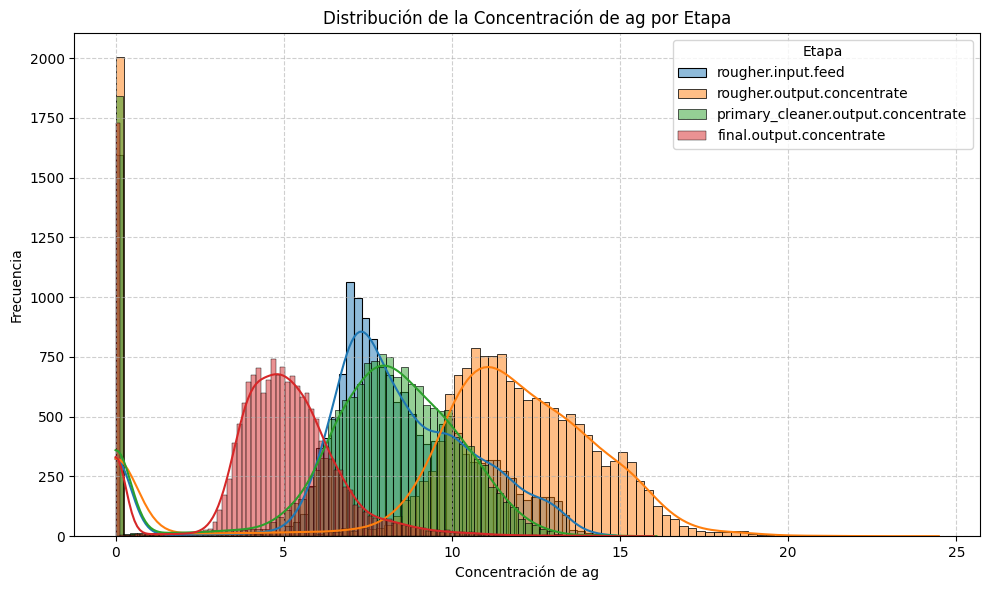

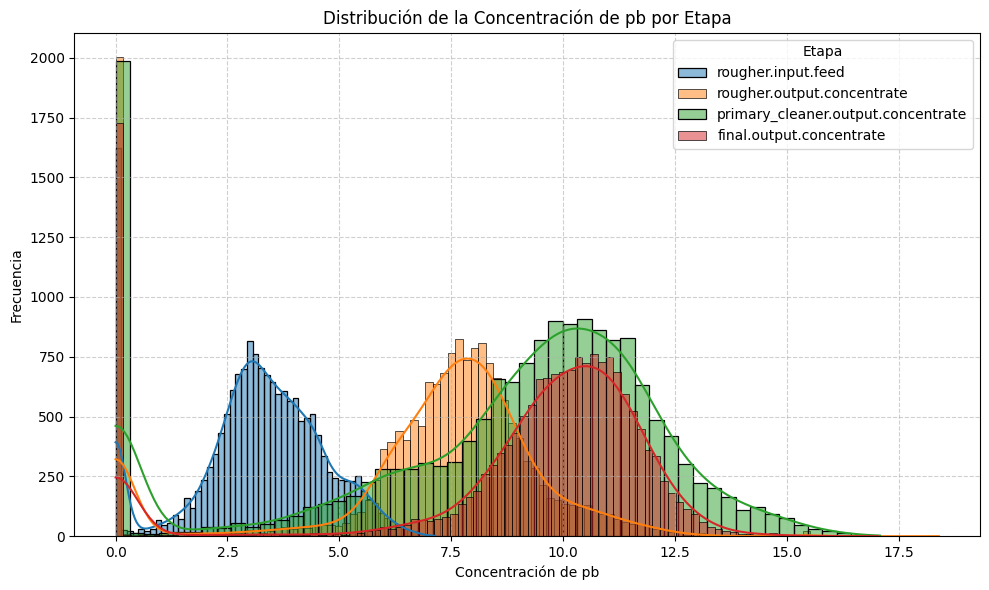

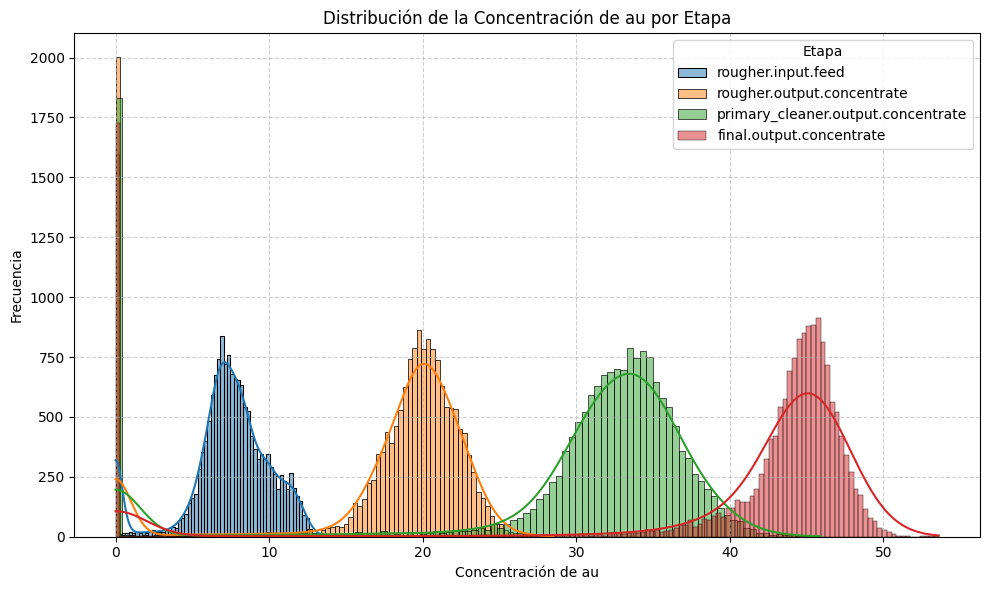

In [55]:
etapas = ['rougher.input.feed', 'rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']
metales = ['ag', 'pb', 'au']

for metal in metales:
    plt.figure(figsize=(10, 6))
    for etapa in etapas:
        columna = f"{etapa}_{metal}"
        if columna in df_train_filled.columns:
            sns.histplot(df_train_filled[columna], kde=True, label=etapa)
        else:
            print(f"Advertencia: La columna '{columna}' no existe en el DataFrame.")

    plt.xlabel(f'Concentración de {metal}')
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de la Concentración de {metal} por Etapa')
    plt.legend(title='Etapa')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

OBSERVACIONES:
- Para la plata se observa que la concentración aumenta significativamente a través de las etapas de procesamiento. Inicialmente baja y concentrada en valores cercanos a cero, la distribución se desplaza a valores más altos y se estrecha a medida que avanza el proceso, indicando una concentración efectiva de plata en el producto final. La mayor ganancia de concentración ocurre en la etapa de rougher.
- Para el plomo ae observa un aumento en la concentración promedio de plomo desde la alimentación inicial hasta el concentrado final, aunque la magnitud del aumento parece menor en comparación con la plata. La distribución se desplaza hacia valores más altos en cada etapa sucesiva, pero también se ensancha ligeramente en las etapas intermedias antes de volverse más centrada en el concentrado final.
- Para el oro se observa un aumento significativo y constante en la concentración promedio de oro en cada etapa sucesiva, mostrando la efectividad del proceso para enriquecer este metal. Las distribuciones se desplazan claramente hacia valores más altos, manteniendo una forma relativamente unimodal en cada etapa, lo que sugiere un proceso de concentración bastante consistente para el oro.

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer </b> <a class="tocSkip"></a>

Si bien a través de la media podemos ver parte de la variación de las concentraciones, esta no da la visión completa de cómo cambió. Mejor realiza un gráfico para cada metal (au, ag, pb) donde en el mismo gráfico estén 4 histogramas, uno para cada uno de los siguientes rougher.input.feed_{}, rougher.output.concentrate_{}, primary_cleaner.output.concentrate_{} y final.output.concentrate_{} ({} reemplazalo para cada metal).
</div>

<div class="alert alert-block alert-info">
<b>Se realizan ajustes para cada metal sin considerar la media y se ve claramente la efectividad del oro en cada una de las etapas.</b> <a class="tocSkip"></a>
</div>

## 2.  Compara las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba.

Las columnas importantes para el comparativo son:
- primary_cleaner.input.feed_size
- rougher.input.feed_size

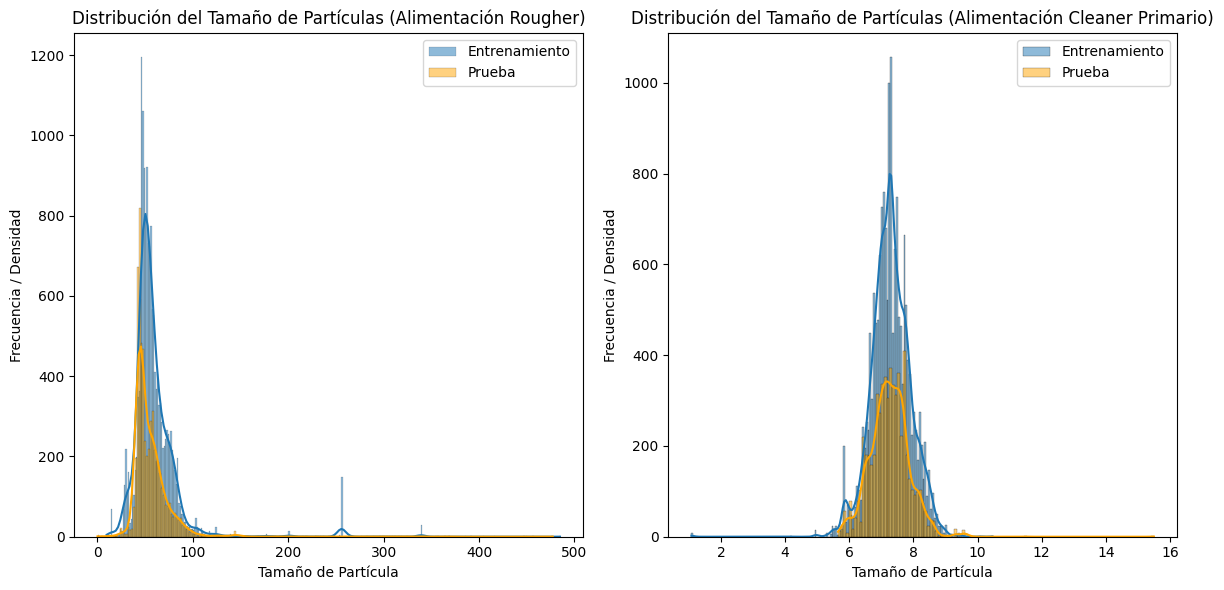

In [56]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_train_filled['rougher.input.feed_size'], kde=True, label='Entrenamiento')
sns.histplot(df_test_filled['rougher.input.feed_size'], kde=True, color='orange', label='Prueba')
plt.title('Distribución del Tamaño de Partículas (Alimentación Rougher)')
plt.xlabel('Tamaño de Partícula')
plt.ylabel('Frecuencia / Densidad')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df_train_filled['primary_cleaner.input.feed_size'], kde=True, label='Entrenamiento')
sns.histplot(df_test_filled['primary_cleaner.input.feed_size'], kde=True, color='orange', label='Prueba')
plt.title('Distribución del Tamaño de Partículas (Alimentación Cleaner Primario)')
plt.xlabel('Tamaño de Partícula')
plt.ylabel('Frecuencia / Densidad')
plt.legend()

plt.tight_layout()
plt.show()

 Las distribuciones del tamaño de las partículas en las etapas de alimentacion para los conjuntos de entrenamiento y prueba son bastante similares. Esto es una buena señal, ya que nos indica que podremos entrenar al modelo de manera correcta.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer </b> <a class="tocSkip"></a>

Bien hecho, muy bien!
</div>

## 3. Concentraciones totales en las diferentes etapas

Nos enfocaremos únicamente en la etapa de la materia prima debido a que no tenemos suficiente información en df_test para poder evaluar las otras etapas.

In [57]:
# Agregamos columnas a df_test_filled
columnas_faltantes = ['rougher.output.concentrate_ag','rougher.output.concentrate_pb', 'rougher.output.concentrate_sol','rougher.output.concentrate_au','final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']
columnas_modelo = ['rougher.output.recovery','final.output.recovery']
for col in columnas_faltantes:
    if col not in df_test_filled.columns:
        df_test_filled[col] = np.nan

df_full_temp = df_full_filled[['date'] + columnas_faltantes + columnas_modelo].copy()
df_test_filled = pd.merge(df_test_filled, df_full_temp, on='date', how='left', suffixes=('', '_full_temp'))

df_test_filled = df_test_filled.drop(columns=columnas_faltantes)

nuevos_nombres = {
    'rougher.output.concentrate_ag_full_temp': 'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb_full_temp': 'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol_full_temp': 'rougher.output.concentrate_sol',
    'rougher.output.concentrate_au_full_temp': 'rougher.output.concentrate_au',
    'final.output.concentrate_ag_full_temp': 'final.output.concentrate_ag',
    'final.output.concentrate_pb_full_temp': 'final.output.concentrate_pb',
    'final.output.concentrate_sol_full_temp': 'final.output.concentrate_sol',
    'final.output.concentrate_au_full_temp': 'final.output.concentrate_au',
    'rougher.output.recovery_full_temp': 'rougher.output.recovery',
    'final.output.recovery_full_temp': 'final.output.recovery'
}

df_test_filled.rename(columns=nuevos_nombres, inplace=True)

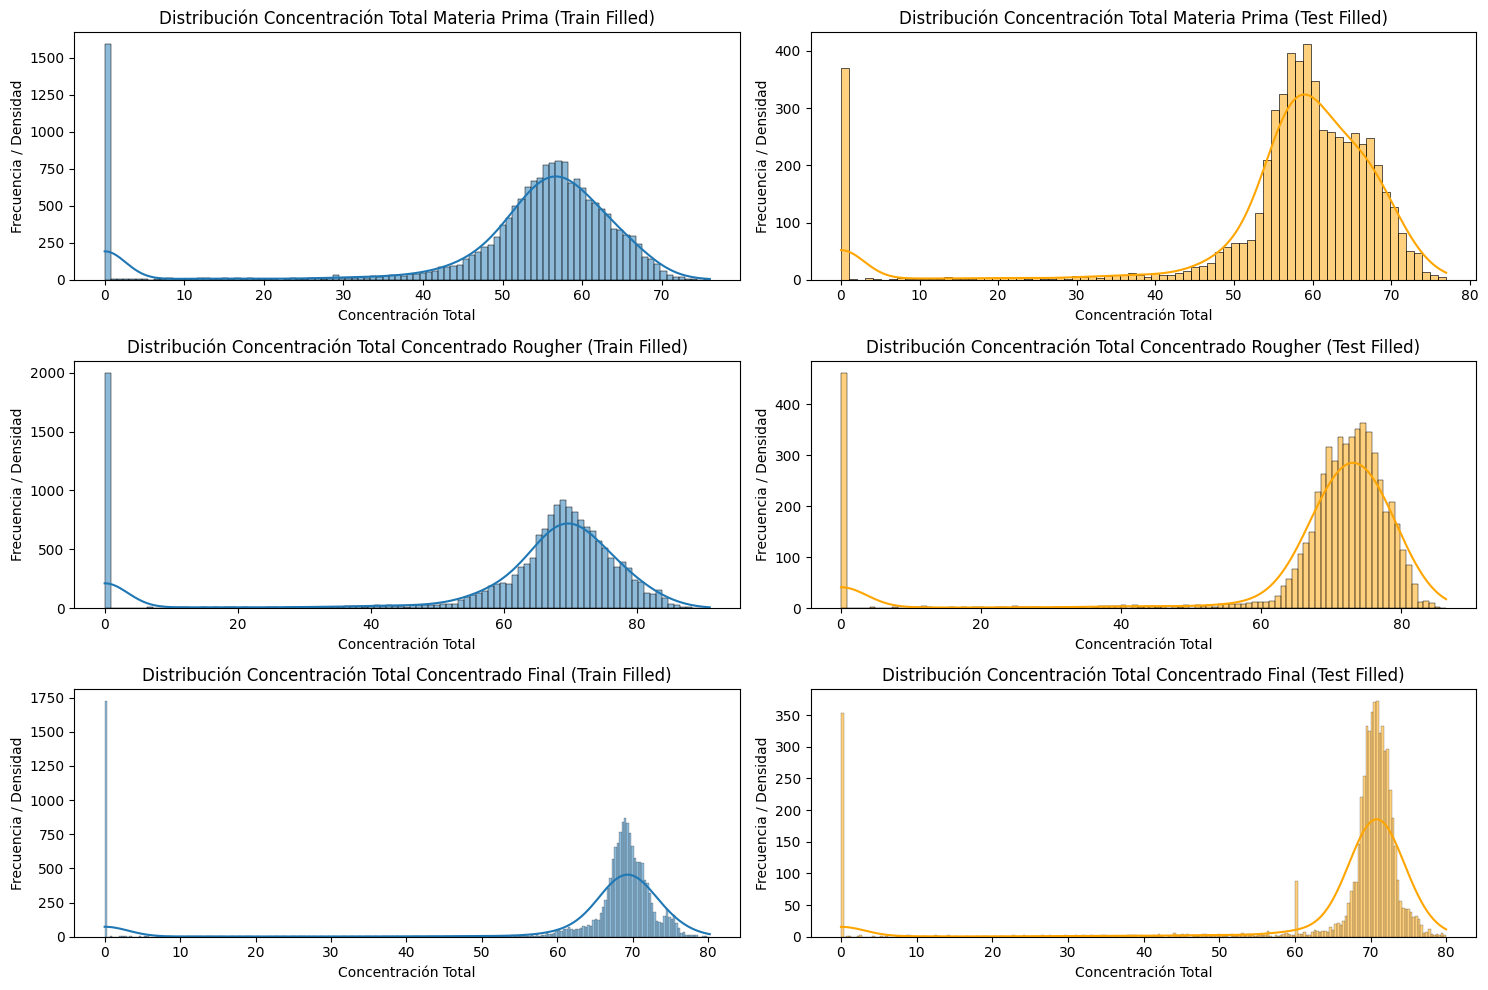

In [58]:
# Etapas
rougher_input_cols = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']
rougher_output_concentrate_cols = ['rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_sol','rougher.output.concentrate_au']
final_output_concentrate_cols = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']


# Calcular la concentración total de cada etapa en el conjunto de entrenamiento y prueba
df_train_filled['rougher_input_total'] = df_train_filled[rougher_input_cols].sum(axis=1) # Materia prima
df_test_filled['rougher_input_total'] = df_test_filled[rougher_input_cols].sum(axis=1) # Materia prima
df_train_filled['rougher_output_total'] = df_train_filled[rougher_output_concentrate_cols].sum(axis=1) # Concentrado rougher
df_test_filled['rougher_output_total'] = df_test_filled[rougher_output_concentrate_cols].sum(axis=1) # Concentrado rougher
df_train_filled['final_output_total'] = df_train_filled[final_output_concentrate_cols].sum(axis=1) # Concentrado final
df_test_filled['final_output_total'] = df_test_filled[final_output_concentrate_cols].sum(axis=1) # Concentrado final

# Visualización modificada (solo histogramas)
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
sns.histplot(df_train_filled['rougher_input_total'], kde=True)
plt.title('Distribución Concentración Total Materia Prima (Train Filled)')
plt.xlabel('Concentración Total')
plt.ylabel('Frecuencia / Densidad')

plt.subplot(3, 2, 2)
sns.histplot(df_test_filled['rougher_input_total'], kde=True, color='orange')
plt.title('Distribución Concentración Total Materia Prima (Test Filled)')
plt.xlabel('Concentración Total')
plt.ylabel('Frecuencia / Densidad')

plt.subplot(3, 2, 3)
sns.histplot(df_train_filled['rougher_output_total'], kde=True)
plt.title('Distribución Concentración Total Concentrado Rougher (Train Filled)')
plt.xlabel('Concentración Total')
plt.ylabel('Frecuencia / Densidad')

plt.subplot(3, 2, 4)
sns.histplot(df_test_filled['rougher_output_total'], kde=True, color='orange')
plt.title('Distribución Concentración Total Concentrado Rougher (Test Filled)')
plt.xlabel('Concentración Total')
plt.ylabel('Frecuencia / Densidad')

plt.subplot(3, 2, 5)
sns.histplot(df_train_filled['final_output_total'], kde=True)
plt.title('Distribución Concentración Total Concentrado Final (Train Filled)')
plt.xlabel('Concentración Total')
plt.ylabel('Frecuencia / Densidad')

plt.subplot(3, 2, 6)
sns.histplot(df_test_filled['final_output_total'], kde=True, color='orange')
plt.title('Distribución Concentración Total Concentrado Final (Test Filled)')
plt.xlabel('Concentración Total')
plt.ylabel('Frecuencia / Densidad')

plt.tight_layout()
plt.show()

- Existen anomalias por lo que procedemos a eliminar  valores definiendo un umbral para cada etapa:
    - Materia Prima: 40
    - Rougher: 50
    - Rougher_Final: 60

Materia Prima (rougher input):
  Entrenamiento: Filas eliminadas: 2186
  Prueba: Filas eliminadas: 510


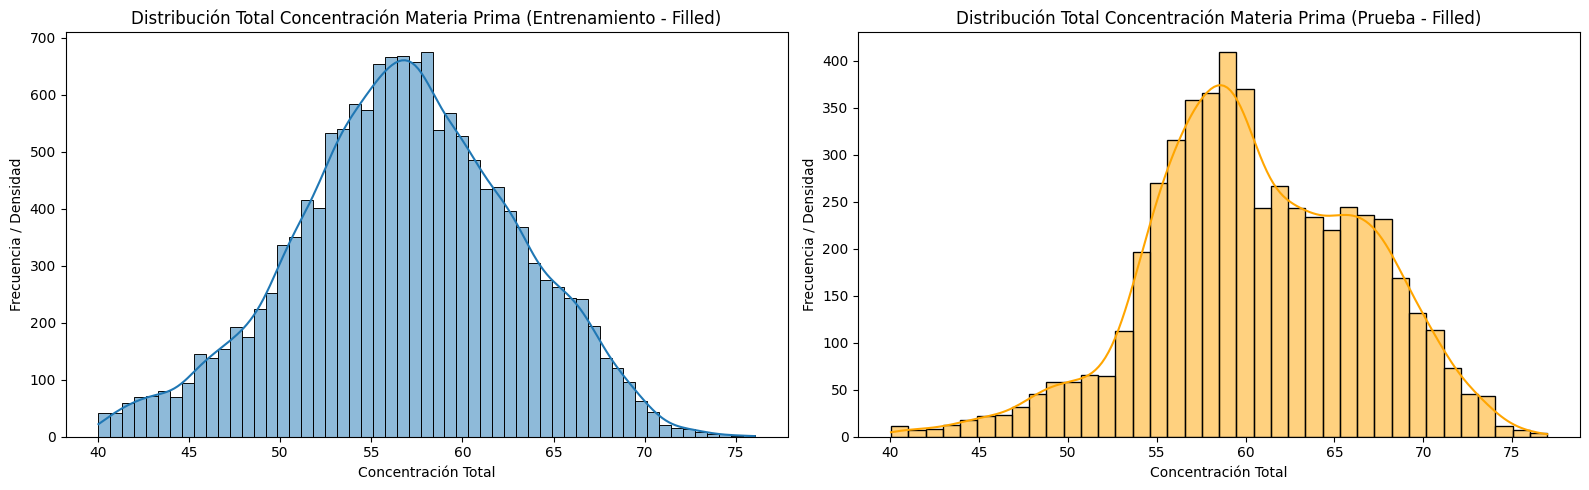


Concentrado Rougher (rougher output):
  Entrenamiento: Filas eliminadas: 842
  Prueba: Filas eliminadas: 161


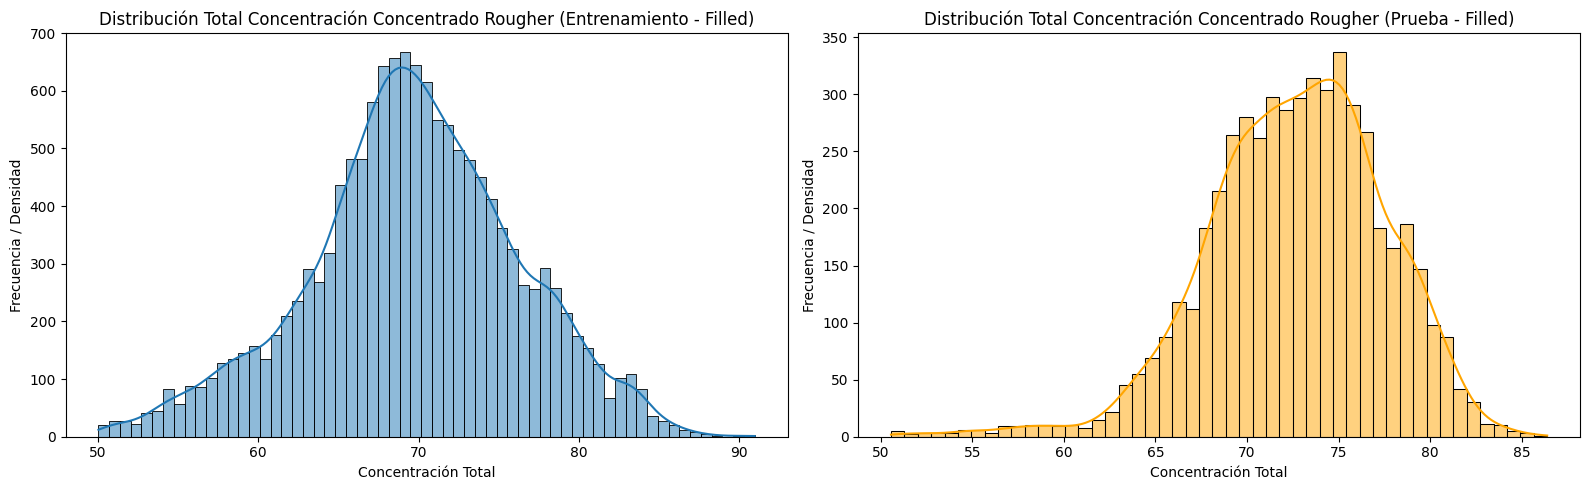


Concentrado Final (final output):
  Entrenamiento: Filas eliminadas: 431
  Prueba: Filas eliminadas: 190


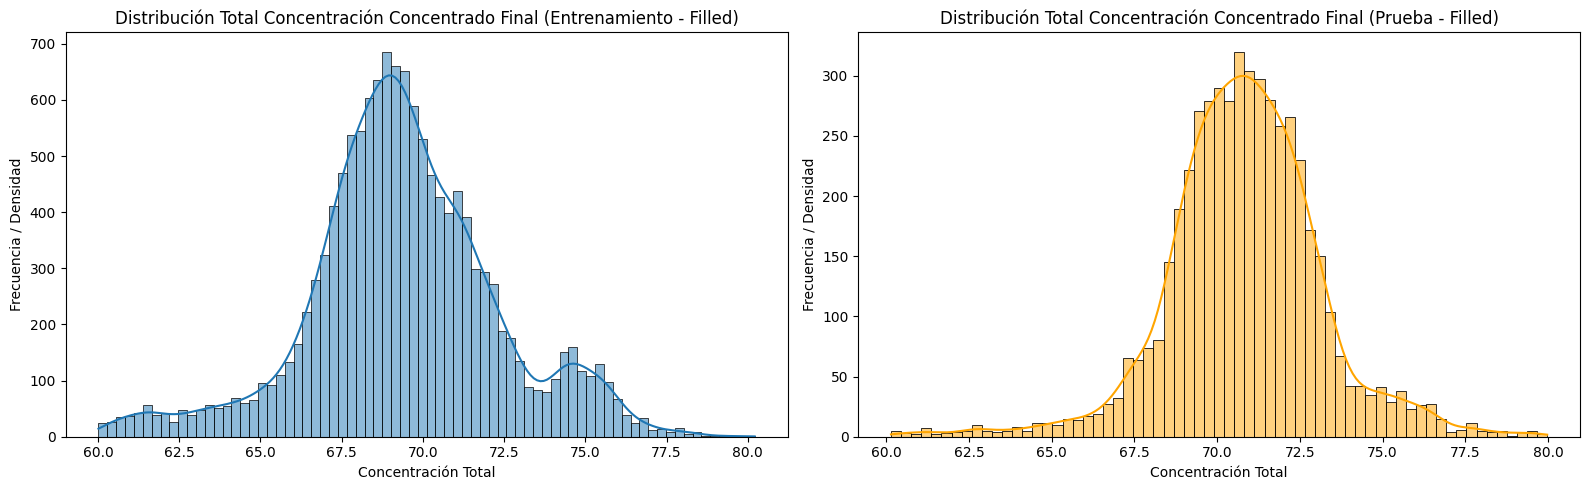

In [59]:
# Umbrales para cada etapa
threshold_rougher_input = 40.0
threshold_rougher_output = 50.0
threshold_final_output = 60.0

# 1. Materia Prima (rougher input)

# Calcular la concentración total en la materia prima (rougher input)
df_train_filled['rougher_input_total'] = df_train_filled[rougher_input_cols].sum(axis=1)
df_test_filled['rougher_input_total'] = df_test_filled[rougher_input_cols].sum(axis=1)

# Identificar y eliminar anomalías
anomalous_indices_train = df_train_filled[df_train_filled['rougher_input_total'] < threshold_rougher_input].index
df_train_filled.drop(anomalous_indices_train, inplace=True)

anomalous_indices_test = df_test_filled[df_test_filled['rougher_input_total'] < threshold_rougher_input].index
df_test_filled.drop(anomalous_indices_test, inplace=True)

print("Materia Prima (rougher input):")
print(f"  Entrenamiento: Filas eliminadas: {len(anomalous_indices_train)}")
print(f"  Prueba: Filas eliminadas: {len(anomalous_indices_test)}")

# Visualización (Materia Prima)
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_train_filled['rougher_input_total'], kde=True)
plt.title('Distribución Total Concentración Materia Prima (Entrenamiento - Filled)')
plt.xlabel('Concentración Total')
plt.ylabel('Frecuencia / Densidad')

plt.subplot(1, 2, 2)
sns.histplot(df_test_filled['rougher_input_total'], kde=True, color='orange')
plt.title('Distribución Total Concentración Materia Prima (Prueba - Filled)')
plt.xlabel('Concentración Total')
plt.ylabel('Frecuencia / Densidad')

plt.tight_layout()
plt.show()

# 2. Concentrado Rougher (rougher output)

# Calcular la concentración total en el concentrado rougher
df_train_filled['rougher_output_total'] = df_train_filled[rougher_output_concentrate_cols].sum(axis=1)
df_test_filled['rougher_output_total'] = df_test_filled[rougher_output_concentrate_cols].sum(axis=1)

# Identificar y eliminar anomalías
anomalous_indices_train = df_train_filled[df_train_filled['rougher_output_total'] < threshold_rougher_output].index
df_train_filled.drop(anomalous_indices_train, inplace=True)

anomalous_indices_test = df_test_filled[df_test_filled['rougher_output_total'] < threshold_rougher_output].index
df_test_filled.drop(anomalous_indices_test, inplace=True)

print("\nConcentrado Rougher (rougher output):")
print(f"  Entrenamiento: Filas eliminadas: {len(anomalous_indices_train)}")
print(f"  Prueba: Filas eliminadas: {len(anomalous_indices_test)}")

# Visualización (Concentrado Rougher)
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_train_filled['rougher_output_total'], kde=True)
plt.title('Distribución Total Concentración Concentrado Rougher (Entrenamiento - Filled)')
plt.xlabel('Concentración Total')
plt.ylabel('Frecuencia / Densidad')

plt.subplot(1, 2, 2)
sns.histplot(df_test_filled['rougher_output_total'], kde=True, color='orange')
plt.title('Distribución Total Concentración Concentrado Rougher (Prueba - Filled)')
plt.xlabel('Concentración Total')
plt.ylabel('Frecuencia / Densidad')

plt.tight_layout()
plt.show()

# 3. Concentrado Final (final output)

# Calcular la concentración total en el concentrado final
df_train_filled['final_output_total'] = df_train_filled[final_output_concentrate_cols].sum(axis=1)
df_test_filled['final_output_total'] = df_test_filled[final_output_concentrate_cols].sum(axis=1)

# Identificar y eliminar anomalías
anomalous_indices_train = df_train_filled[df_train_filled['final_output_total'] < threshold_final_output].index
df_train_filled.drop(anomalous_indices_train, inplace=True)

anomalous_indices_test = df_test_filled[df_test_filled['final_output_total'] < threshold_final_output].index
df_test_filled.drop(anomalous_indices_test, inplace=True)

print("\nConcentrado Final (final output):")
print(f"  Entrenamiento: Filas eliminadas: {len(anomalous_indices_train)}")
print(f"  Prueba: Filas eliminadas: {len(anomalous_indices_test)}")

# Visualización (Concentrado Final)
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_train_filled['final_output_total'], kde=True)
plt.title('Distribución Total Concentración Concentrado Final (Entrenamiento - Filled)')
plt.xlabel('Concentración Total')
plt.ylabel('Frecuencia / Densidad')

plt.subplot(1, 2, 2)
sns.histplot(df_test_filled['final_output_total'], kde=True, color='orange')
plt.title('Distribución Total Concentración Concentrado Final (Prueba - Filled)')
plt.xlabel('Concentración Total')
plt.ylabel('Frecuencia / Densidad')

plt.tight_layout()
plt.show()

- Se observan anomalias en cada etapa por lo que es prudente eliminarlas para el buen entrenamiento del modelo y tener predicciones mas exactas.
- Se definieron diferentes umbrales para cada etapa para tener mayor presicion.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer </b> <a class="tocSkip"></a>

Excelente, buen trabajo. Muy claros los gráficos y bien con la eliminación de los outliers
</div>

# 3. Construye el modelo

## 1. Escribe una función para calcular el valor final de sMAPE.

In [60]:
def smape(y_true, y_pred):
    """
    Calcula el Symmetric Mean Absolute Percentage Error (SMAPE).
    """
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

def final_smape(rougher_true, rougher_pred, final_true, final_pred):
    """
    Calcula el SMAPE final ponderado (25% rougher, 75% final).
    """
    smape_rougher = smape(rougher_true, rougher_pred)
    smape_final = smape(final_true, final_pred)
    return 0.25 * smape_rougher + 0.75 * smape_final

In [61]:
# Alineamos caracteristicas y objetivos
train_cols = set(df_train_filled.columns)
test_cols = set(df_test_filled.columns)

# Columnas comunes a ambos DataFrames
common_cols = list(train_cols.intersection(test_cols))
common_cols.sort()  # Importante: Ordenar las columnas

df_train_cleaned= df_train_filled[common_cols]
df_test_cleaned = df_test_filled[common_cols]

## 2. Entrena diferentes modelos. Evalúalos aplicando la validación cruzada

In [62]:
# Preparamos datos del modelo:
features_train = df_train_cleaned.drop(columns=['date', 'final.output.recovery', 'rougher.output.recovery'], errors='ignore')
target_rougher_train = df_train_cleaned['rougher.output.recovery']
target_final_train = df_train_cleaned['final.output.recovery']

features_test = df_test_cleaned.drop(columns=['date', 'final.output.recovery', 'rougher.output.recovery'], errors='ignore')
target_rougher_test = df_test_cleaned['rougher.output.recovery']
target_final_test = df_test_cleaned['final.output.recovery']

In [63]:
models = {
    'RandomForest': RandomForestRegressor(random_state=12345),
    'RandomForest_n100_d10': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=12345),
    'RandomForest_n50_d5': RandomForestRegressor(n_estimators=50, max_depth=5, random_state=12345),
    'DecisionTree': DecisionTreeRegressor(random_state=12345),
    'DecisionTree_d5': DecisionTreeRegressor(max_depth=5, random_state=12345),
    'LinearRegression': LinearRegression()
}

# 3. Configurar la validación cruzada y el scoring
cv = KFold(n_splits=3, shuffle=True, random_state=12345)
smape_scorer = make_scorer(smape, greater_is_better=False)

# 4. Entrenar y evaluar modelos con validación cruzada
results = {}
for name, model in models.items():
    pipeline_rougher = Pipeline([('scaler', StandardScaler()), ('model', model)])
    pipeline_final = Pipeline([('scaler', StandardScaler()), ('model', model)])

    cv_scores_rougher = cross_val_score(pipeline_rougher, features_train, target_rougher_train, cv=cv, scoring=smape_scorer)
    cv_scores_final = cross_val_score(pipeline_final, features_train, target_final_train, cv=cv, scoring=smape_scorer)

    # Calcular el SMAPE final ponderado para cada fold y promediar
    final_smape_scores = []
    for i in range(cv.get_n_splits()):
        final_smape_scores.append(0.25 * cv_scores_rougher[i] + 0.75 * cv_scores_final[i])
    results[name] = np.mean(final_smape_scores)

# 5. Imprimir resultados de la validación cruzada
print("Resultados de la validación cruzada:")
for name, score in results.items():
    print(f"- {name}: SMAPE final promedio = {score:.4f}")  # Imprimir el valor negativo

# 6. Seleccionar el mejor modelo
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nMejor modelo: {best_model_name}")

# 7. Entrenar el mejor modelo en todo el conjunto de entrenamiento
pipeline_best_rougher = Pipeline([('scaler', StandardScaler()), ('model', best_model)])
pipeline_best_final = Pipeline([('scaler', StandardScaler()), ('model', best_model)])

pipeline_best_rougher.fit(features_train, target_rougher_train)
pipeline_best_final.fit(features_train, target_final_train)

# 8. Hacer predicciones en el conjunto de prueba
rougher_predictions_test = pipeline_best_rougher.predict(features_test)
final_predictions_test = pipeline_best_final.predict(features_test)

# 9. Calcular el SMAPE final en el conjunto de prueba
final_smape_test = final_smape(
    target_rougher_test, rougher_predictions_test,
    target_final_test, final_predictions_test
)

# 10. Facilitar los resultados
print(f"\nSMAPE final en el conjunto de prueba para el mejor modelo ({best_model_name}): {final_smape_test:.2f}%")



Resultados de la validación cruzada:
- RandomForest: SMAPE final promedio = -4.3947
- RandomForest_n100_d10: SMAPE final promedio = -5.0828
- RandomForest_n50_d5: SMAPE final promedio = -6.2264
- DecisionTree: SMAPE final promedio = -6.3132
- DecisionTree_d5: SMAPE final promedio = -6.6136
- LinearRegression: SMAPE final promedio = -6.6659

Mejor modelo: RandomForest

SMAPE final en el conjunto de prueba para el mejor modelo (RandomForest): 11.85%


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer </b> <a class="tocSkip"></a>

Muy bien con el entrenamiento de los modelos, pero agrega algunas variaciones adicionales de random forest y/o decision tree, por ejemplo, con diferente depth o n_estimators para random forest. La idea es ver también cómo afectan estos hiperparámetros a los resultados.
</div>

<div class="alert alert-block alert-info">
<b>Se entrena con algunos hiperparametros sin embargo Randomforest sigue siendo el modelo mas ideal con un SMAPE final de 4.3</b> <a class="tocSkip"></a>
</div>

# CONCLUSIONES

- Observamos que el mejor modelo para predicción es Randomforest con una validacion cruzada de 4.3 aplicado el cual se aplica al conjunto de prueba y da un SMAPE final de 11% lo cual se considera un valor bueno.
- Se configuraron 3 modelos con pipeline para arrojar los mejores resultados
- El modelo a elegir es un Randomforest para nuestro modelo de oro extraido